<a href="https://colab.research.google.com/github/sidds4474/Bike-demand-prediction-ML/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999
# setting font weight,label weight,title weight to bold and setting title size,label size,fontsize.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15


In [2]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data file

data = pd.read_csv('/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding = 'latin' )

In [4]:
# Reading the user Reviews file using head method.

data.head(-5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes


In [18]:
data.tail(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [19]:
# Undestand the shape 

data.shape


(8760, 14)

In [20]:
# Getting all the columns name

data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [21]:
# Data type of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [22]:
# Unique values
data.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**Observations:**

1)Null values/missing values- 0

2)Date- columns need to convert into proper data type.

3)Columns to convert into numeric(for modelling Purpose)
seasons
holiday
functioning day

4) Rename columns-

Temperature(°C)

Humidity(%)

Wind speed (m/s)

Visibility (10m)

Dew point temperature(°C)

Solar Radiation (MJ/m2)

Rainfall(mm)

Snowfall (cm)

Rented Bike Count

Functioning Day(Beacuse white spaces and variables having units in brackets which makes difficult to copy variable name.)

In [23]:
# Holiday, functioning day, seasons, Hour - categorical data

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [25]:
# dataset has all values - No missing Values

In [26]:
data.head(-5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes


In [27]:
# Feature Description

# Date - 01/12/2017 - 30/11/2018 format - dd/mm/yyyy - object(We need to convert it to datetime format)

# Rented Bike count - Number of rented bikes per hour - int

# Hour - 24 hour format (0-23) we need to convert into categorical data type

# Temperature - Celcius datatype (float)

# Humidity - 

# Wind Speed - 

# Visibility -

# Dew Point Temp -

# Solar Radiation -

# Rainfall(mm) -

# Snowfall (cm) -

# Seasons -

# Holiday -

# Functioning Day

In [28]:
# Preprocessing
# datatype convert
# categorical data
# column name change


# Pre-Processing

In [29]:
# checking for count of missing values in each column

data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

## As we can see there are no missing values present.

In [30]:
data.head(1)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [31]:
# Changing column names

data = data.rename(columns={
    'Rented Bike Count': 'Rented_Bike_Count',
    'Temperature(°C)': 'Temperature',
    'Humidity(%)':'Humidity',
    'Wind speed (m/s)':'Wind_speed',
    'Visibility (10m)':'Visibility',
    'Dew point temperature(°C)': 'Dew_point_temperature',
    'Solar Radiation (MJ/m2)': 'Solar_Radiation',
    'Rainfall(mm)': 'Rainfall',	
    'Snowfall (cm)':'Snowfall',
    'Functioning Day': 'Functioning_Day'
})

In [32]:
data.head(1)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [33]:
# Date split into year month and day column


data['Date'] =  pd.to_datetime(data['Date'], infer_datetime_format=True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [35]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day_name()

In [36]:
data.head(1)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday




*   We converted 'date' column into 3 different columns i.e year month and day _name.
*   Year Column has only 2 values- 2017 and 2018.

*   Day column contains the details about each day of the month, whether it is weekday or weekend








In [37]:
data = data.drop(columns=['Date','year'], axis=1)

In [38]:
data.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday


In [39]:
data['weekday_weekend'] = data['day'].apply(lambda x: 1 if x == 'Saturday' or x == 'Sunday' else 0)

In [40]:
data.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,day,weekday_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday,0


In [41]:
data = data.drop(columns = ['day'], axis=1)

In [42]:
data.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   int64  
 14  weekday_weekend        8760 non-null   int64  
dtypes: f

In [44]:
data['weekday_weekend'].value_counts()

0    6216
1    2544
Name: weekday_weekend, dtype: int64

In [45]:
data.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
month                      12
weekday_weekend             2
dtype: int64

In [46]:
# Changing columns to category columns
# Month , hour , weekday weekend

columns = ['Hour', 'month', 'weekday_weekend' ]

for i in columns:
  data[i] = data[i].astype('category')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  month                  8760 non-null   category
 14  weekday_weekend        8760 non-null   c

In [48]:
import seaborn as sns

In [49]:
data.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


# Exploratory Data Analysis

[Text(0.5, 1.0, 'Count of bikes vs Month')]

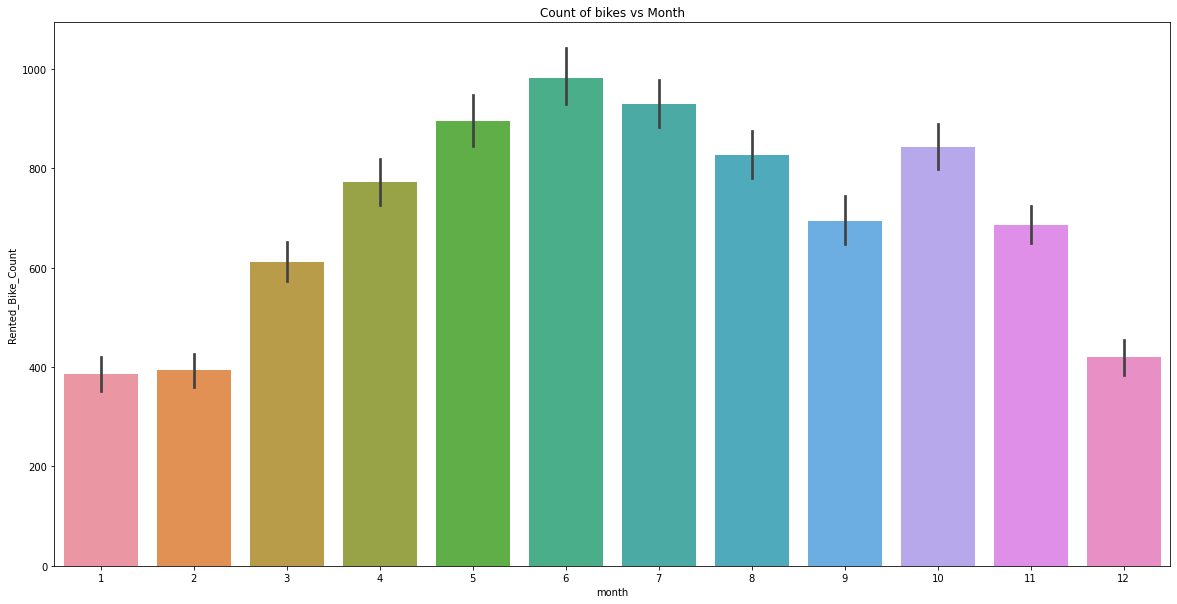

In [50]:
# Bike Count vs Month

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data = data, x = 'month', y ='Rented_Bike_Count', ax = ax)
ax.set(title='Count of bikes vs Month')


From the above graph we see that May to July contributes to the highest demand of rented bikes.

[Text(0.5, 1.0, 'Count of bikes based on weekday or weekend')]

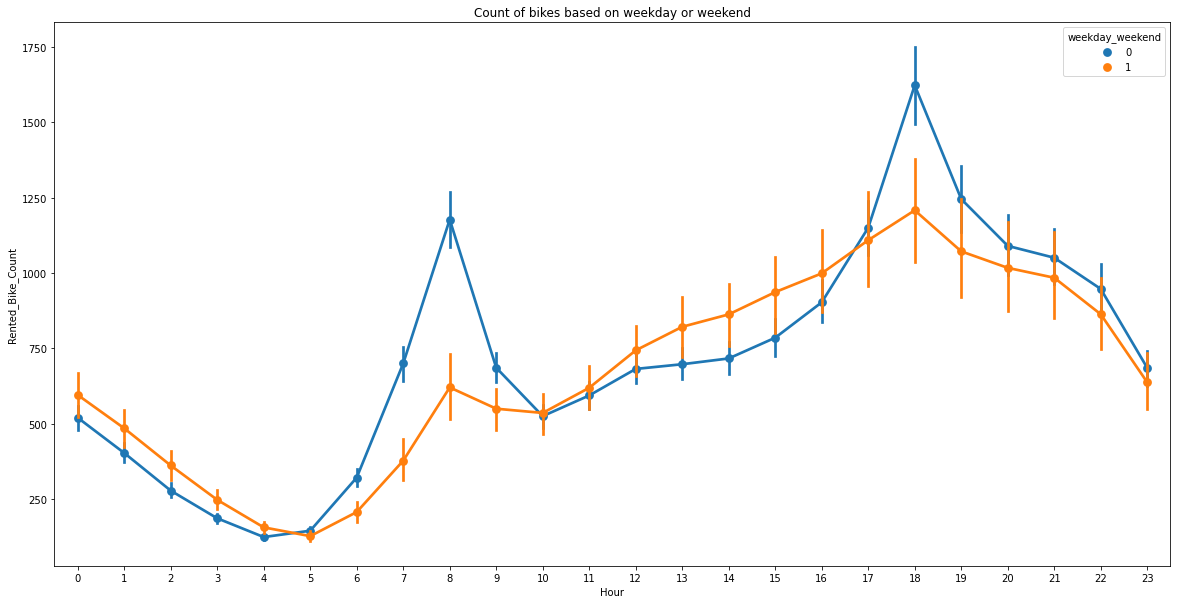

In [51]:
# Weekday vs Weekend
fig,ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = data, x = 'Hour', y ='Rented_Bike_Count', hue ='weekday_weekend',ax = ax)
ax.set(title='Count of bikes based on weekday or weekend')

From the above graph we can see that in weekdays demand is high as compared to weekend because of office.

Peak time of renting a bike is from 6 AM to 9 AM and 5 PM TO 7 PM.

In [52]:
data.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


[Text(0.5, 1.0, 'Count of bikes based on  Functioning Day')]

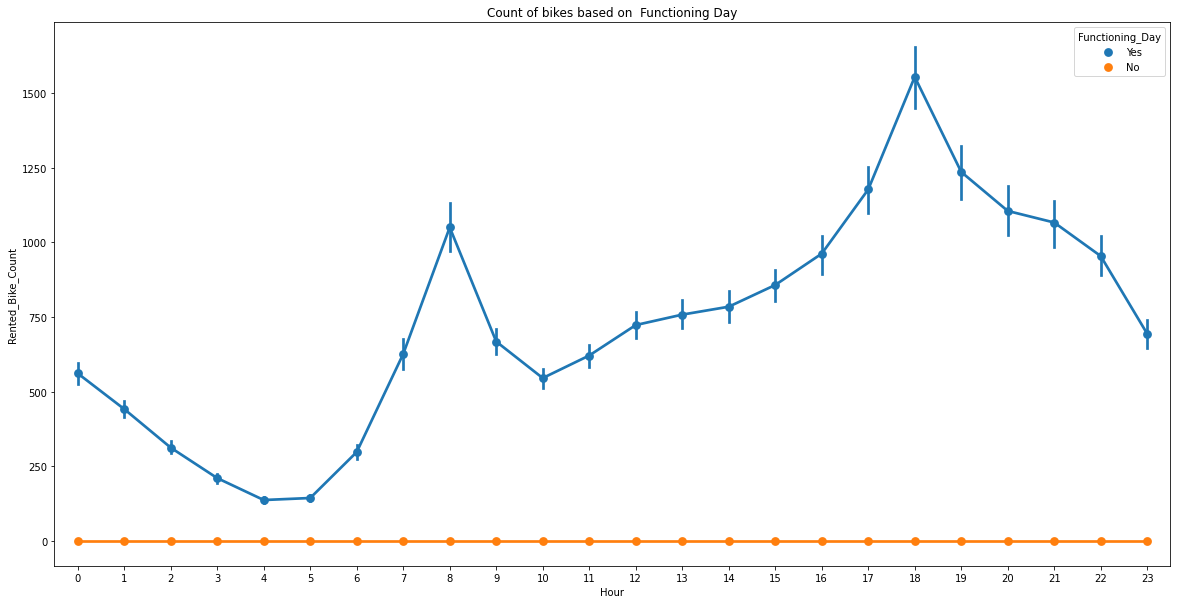

In [53]:
# Functioning Day

fig,ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = data, x = 'Hour', y ='Rented_Bike_Count', hue ='Functioning_Day',ax = ax)
ax.set(title='Count of bikes based on  Functioning Day')

In the above graph we can see that people don't use rented bikes on non functioning day.

[Text(0.5, 1.0, 'Count of bikes vs Season')]

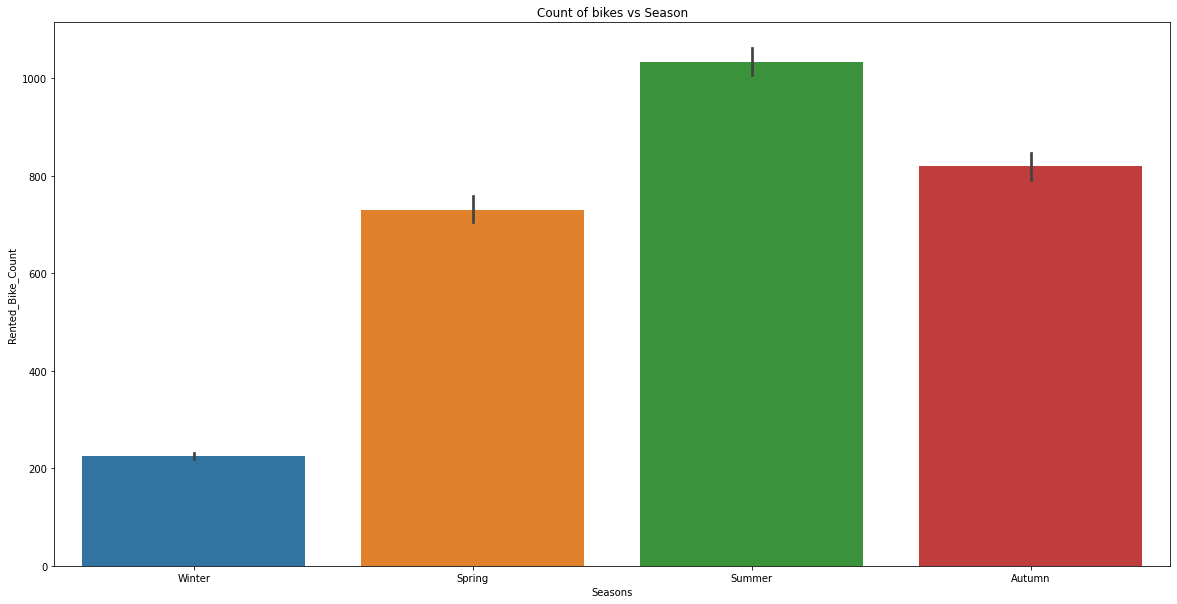

In [54]:
# Rented bike count vs Seasons

fig,ax = plt.subplots(figsize=(20,10))
sns.barplot(data = data, x = 'Seasons', y ='Rented_Bike_Count', ax = ax)
ax.set(title='Count of bikes vs Season')

[Text(0.5, 1.0, 'Count of bikes based on Holidays')]

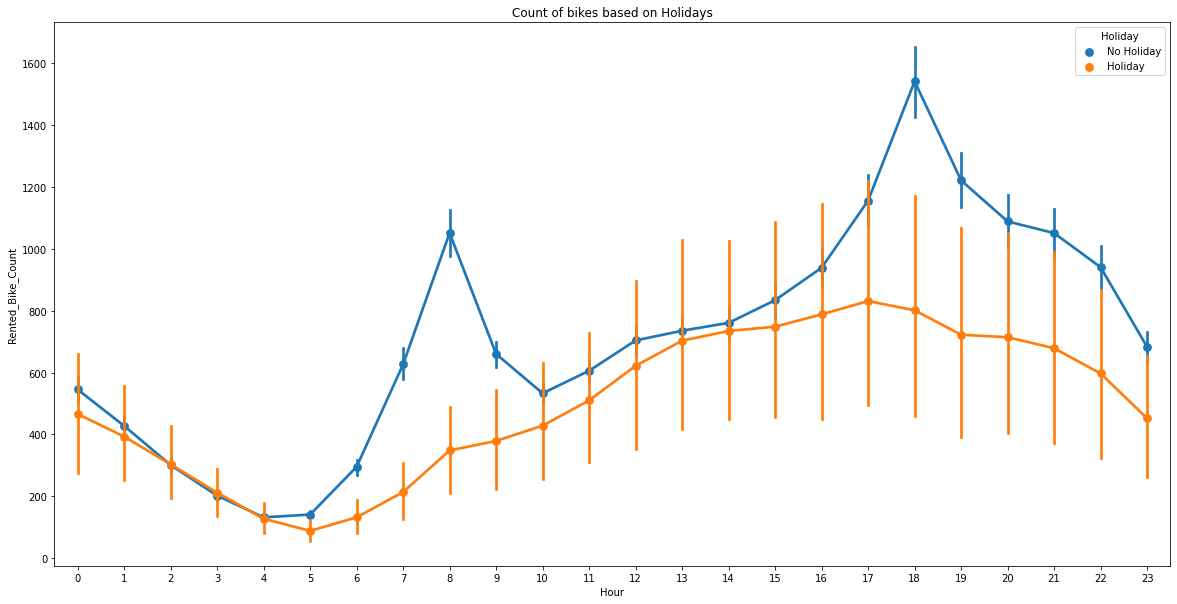

In [55]:
# Rented Bike vs Holiday

fig,ax = plt.subplots(figsize=(20,10))
sns.pointplot(data = data, x = 'Hour', y ='Rented_Bike_Count', hue ='Holiday',ax = ax)
ax.set(title='Count of bikes based on Holidays')

In the above graph we can clearly see use of rented bikes is more in office commuting hours on non holiday.

In [56]:
data.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [57]:
# Numerical data show together (density graphs)
# Regression graph

# rented bike count (DEPENDENT VARIABLE) - bike count (ML ALGORITHM)



In [58]:
# Numerical data
numerical_data = list(data.select_dtypes(['int64', 'float64']).columns)
numerical_data

['Rented_Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

In [59]:
numerical_data = pd.Index(numerical_data)
numerical_data

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


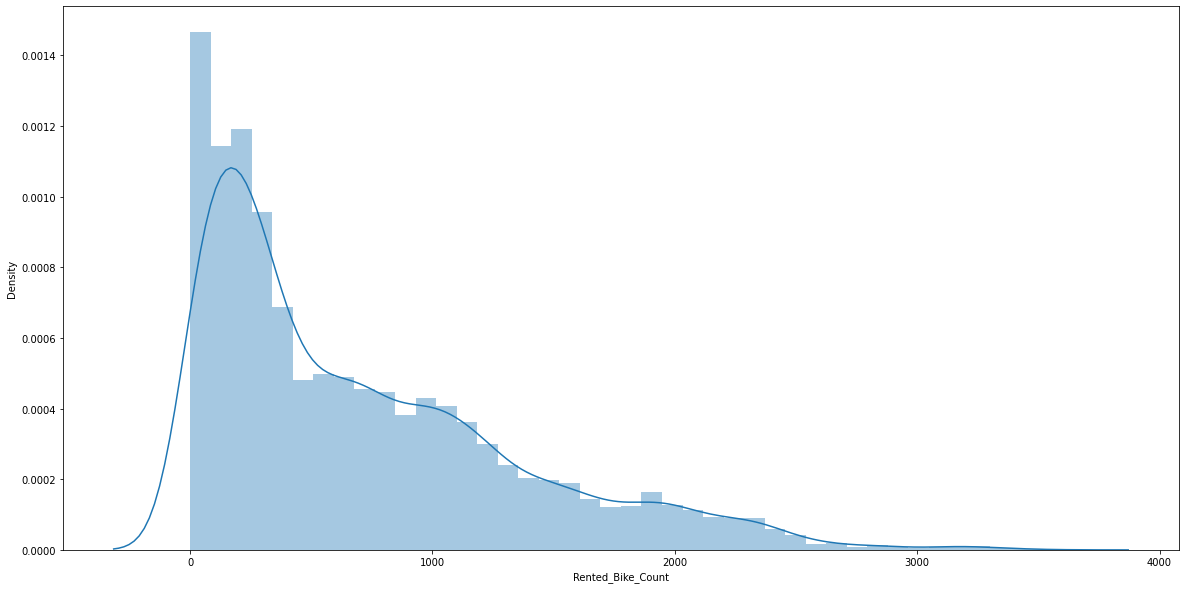

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


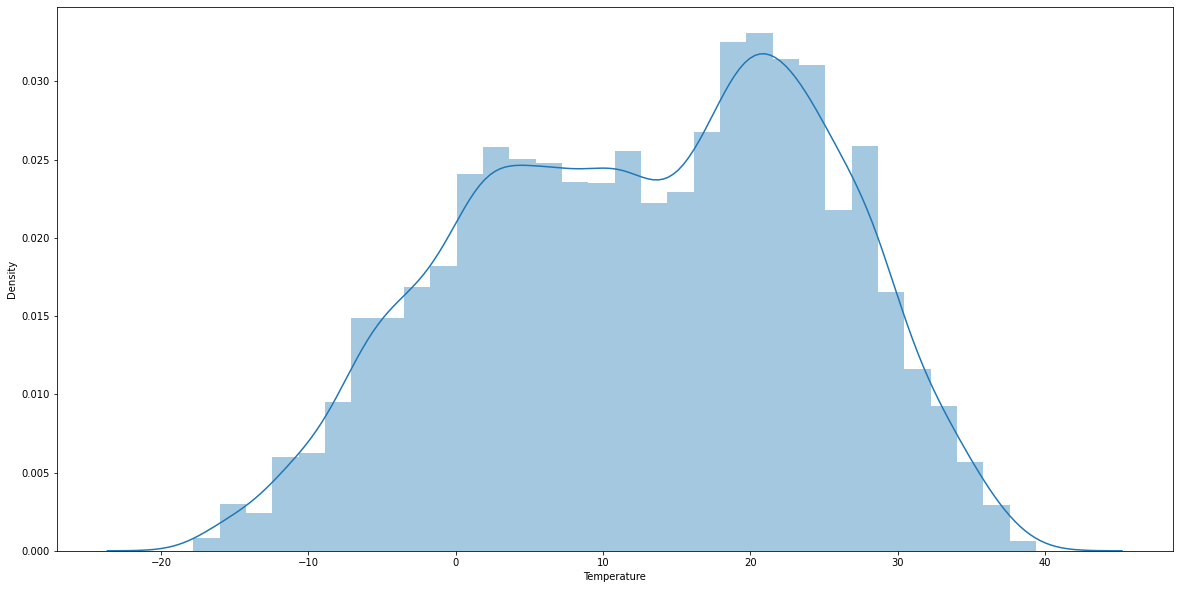

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


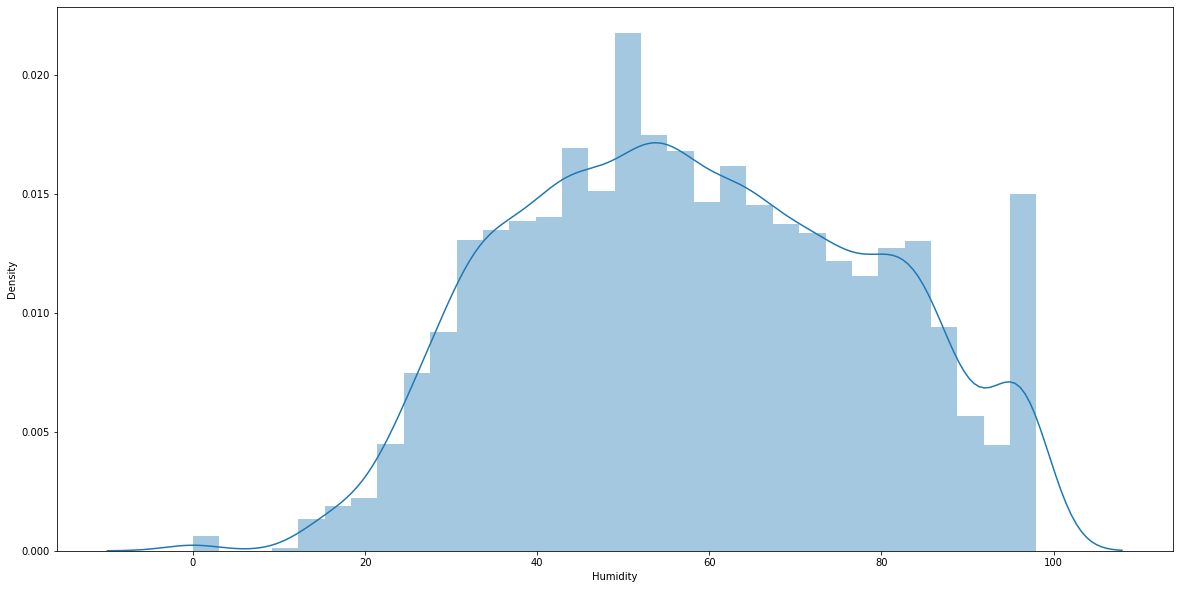

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


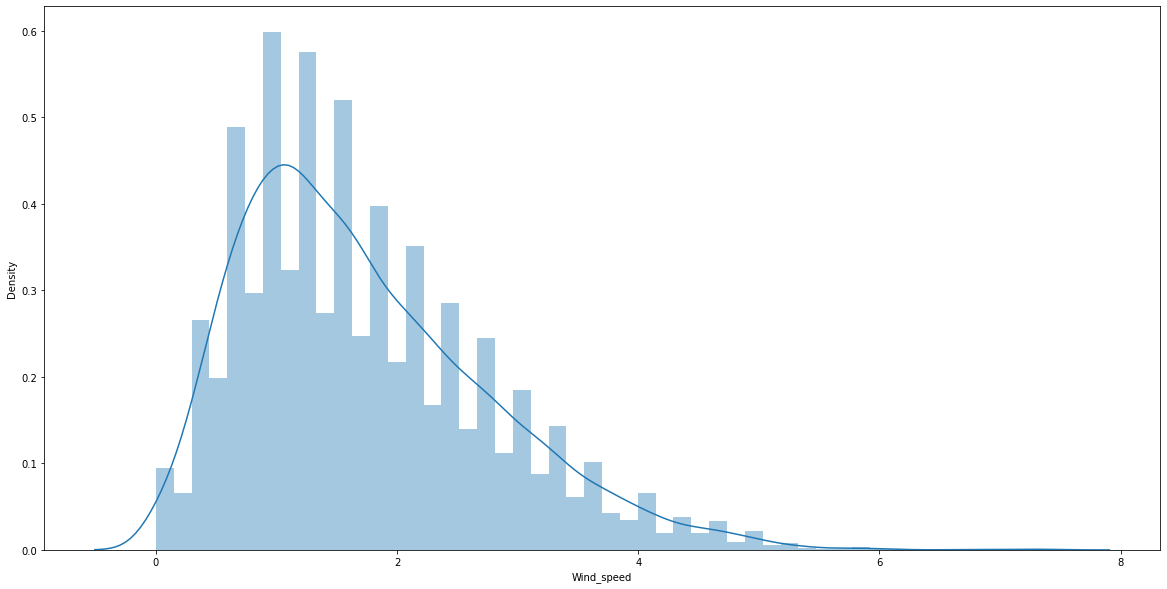

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


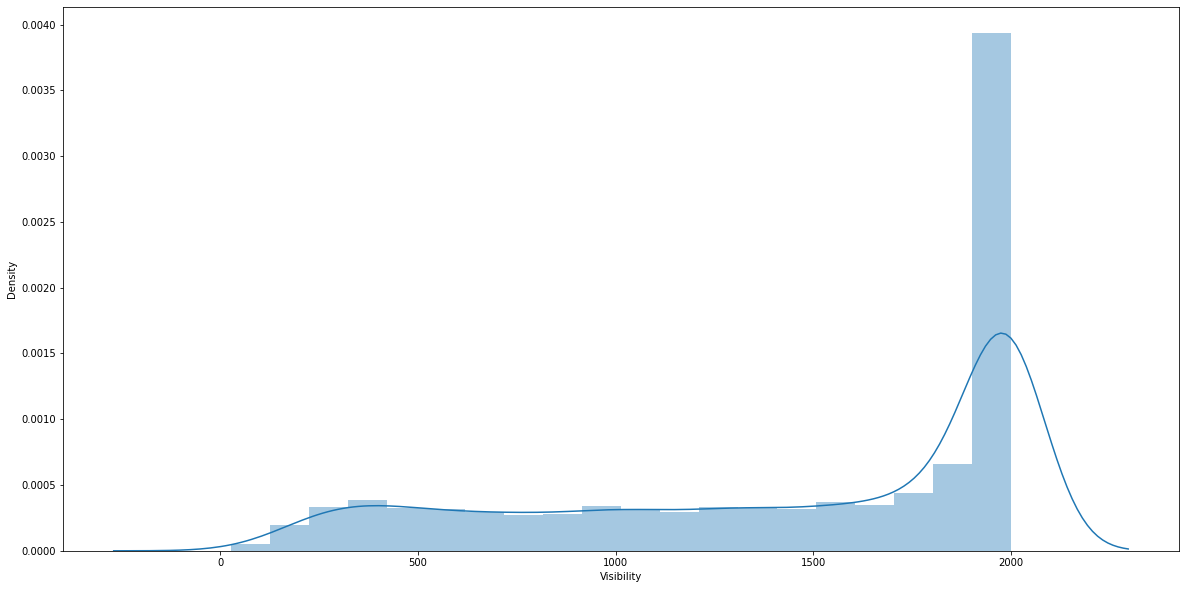

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


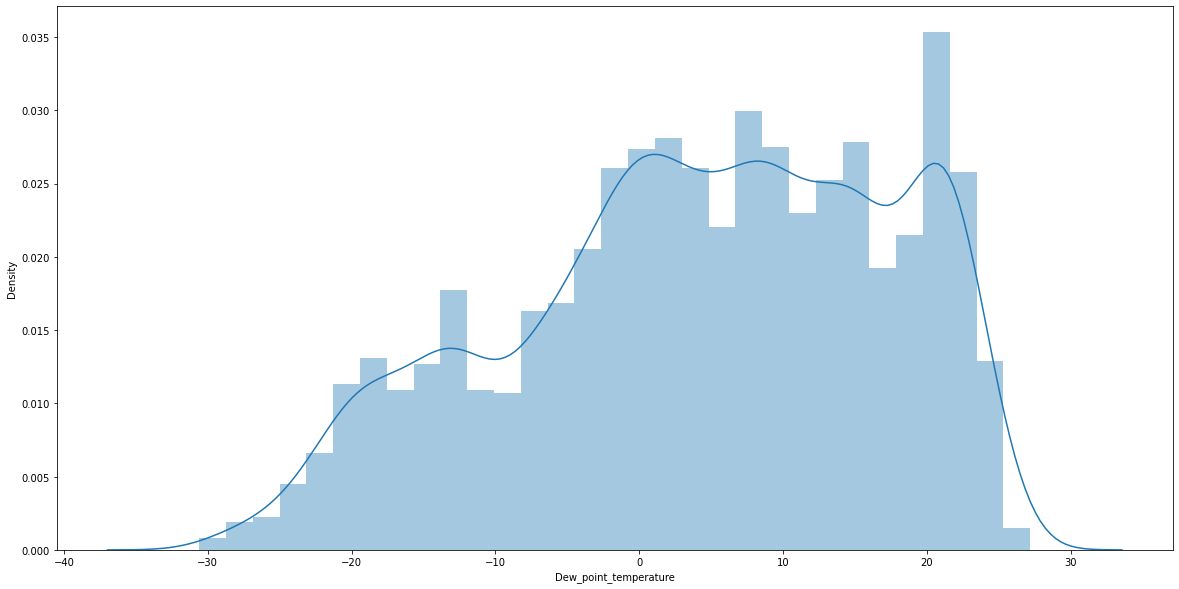

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


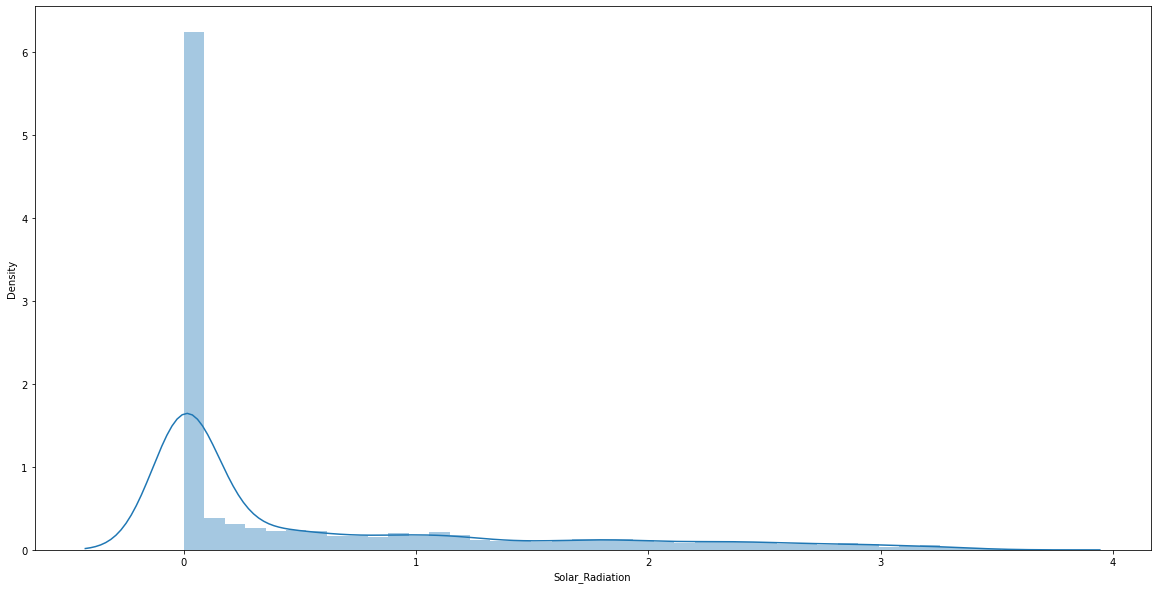

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


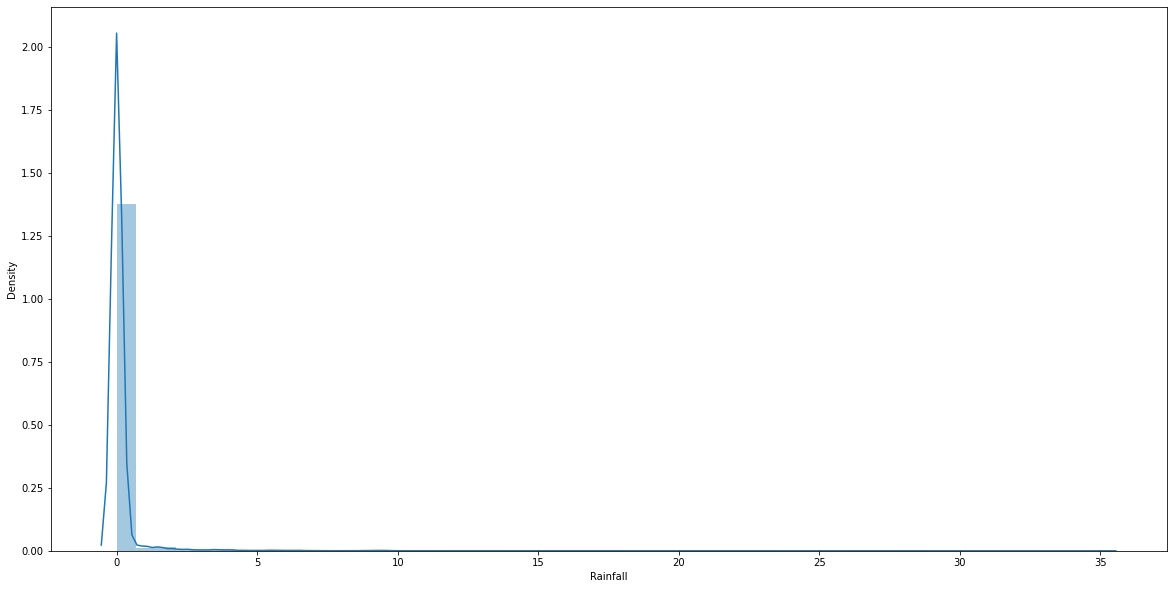

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


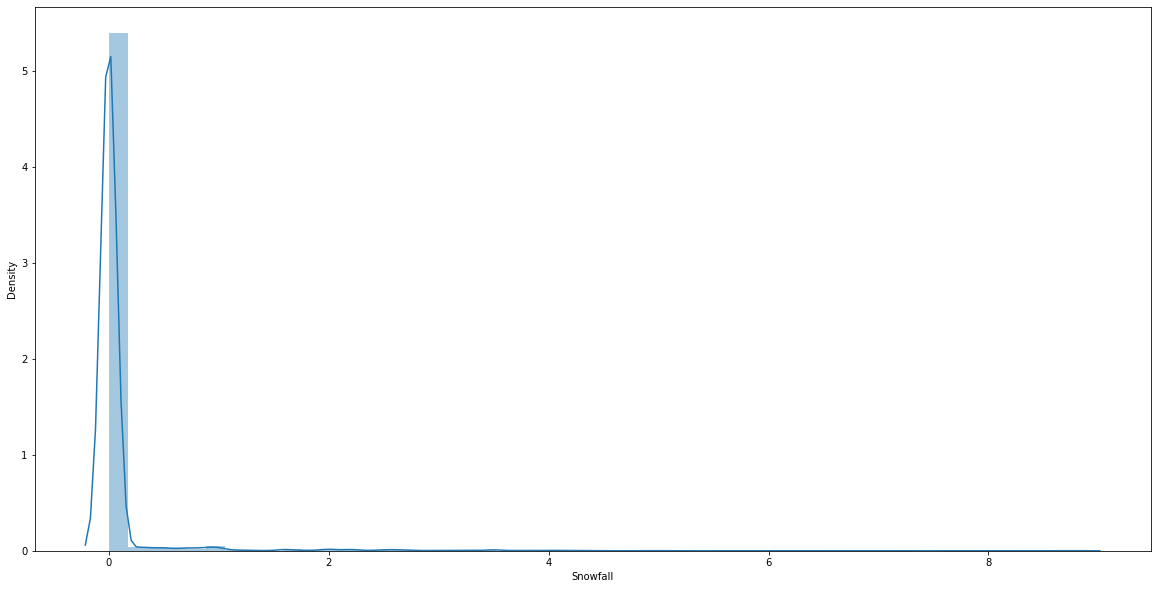

In [60]:
# Using the columns to create graph

for i in numerical_data:
  plt.figure(figsize=(20,10))
  sns.distplot(x = data[i])
  plt.xlabel(i)
  plt.show()


In [61]:
# Regression Analysis

# Dependent variable - Bike Count

# Regression plots - Dependent variables depend on what factors(columns) visulaised via graph



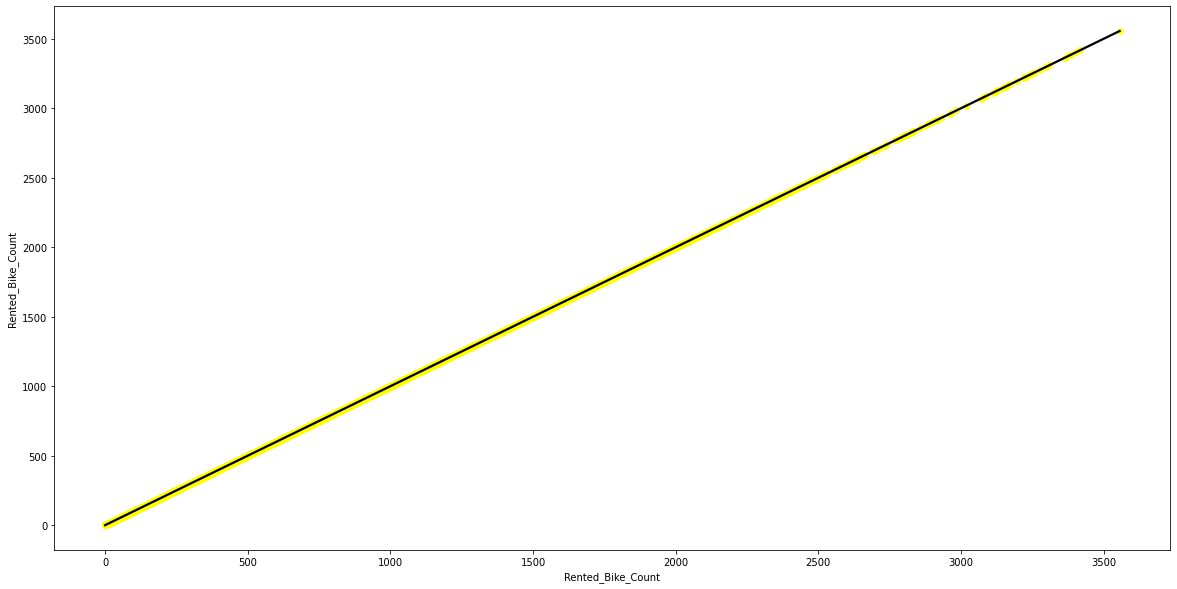

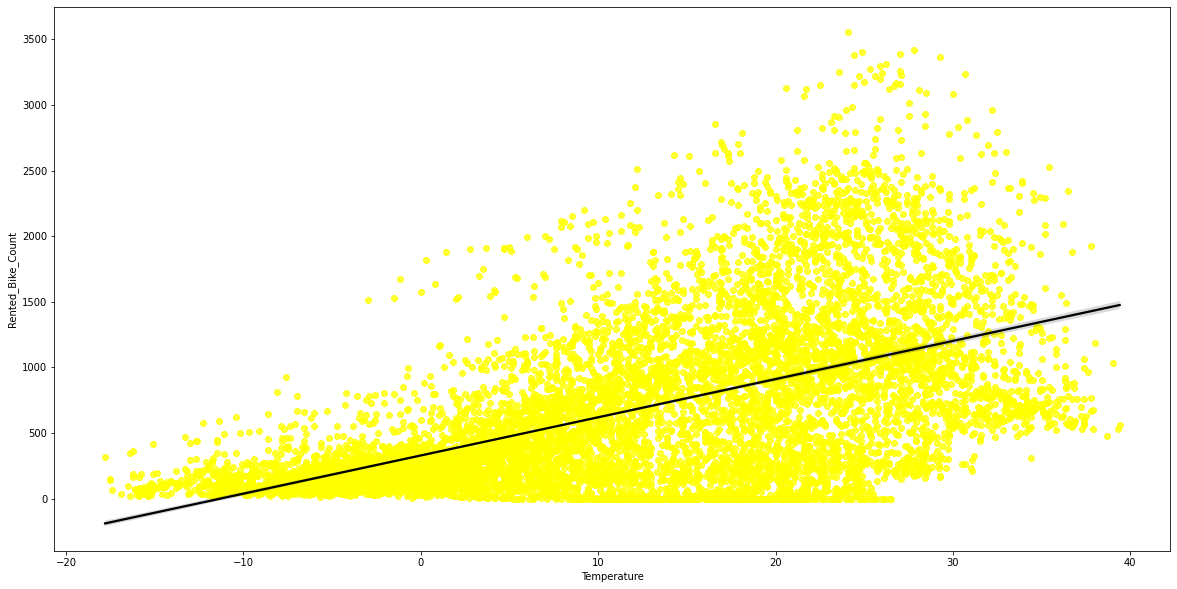

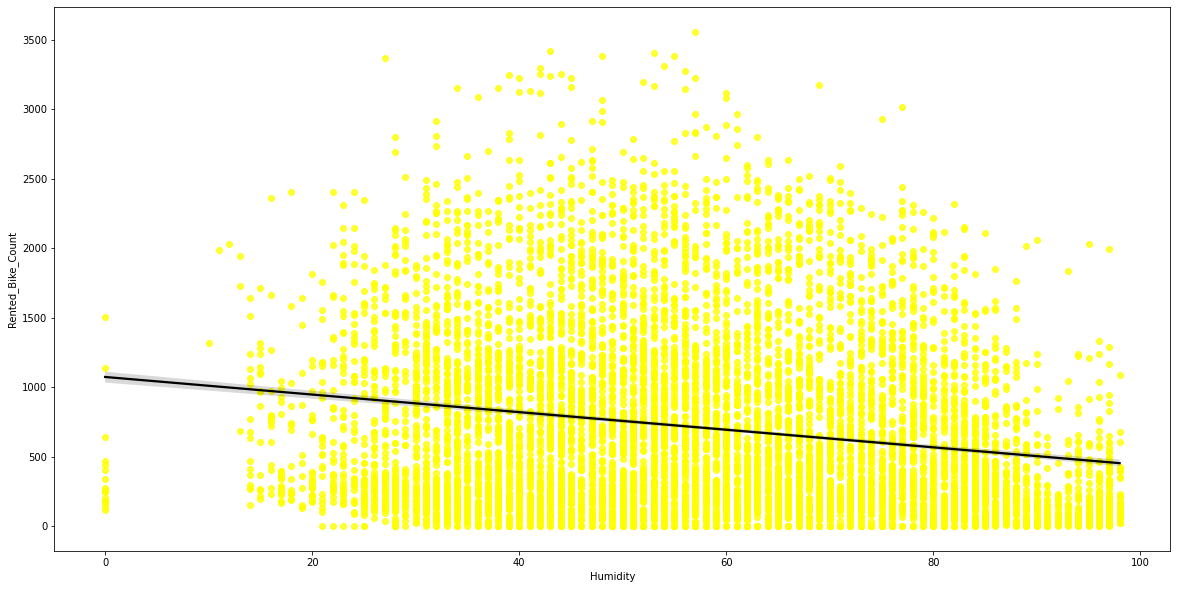

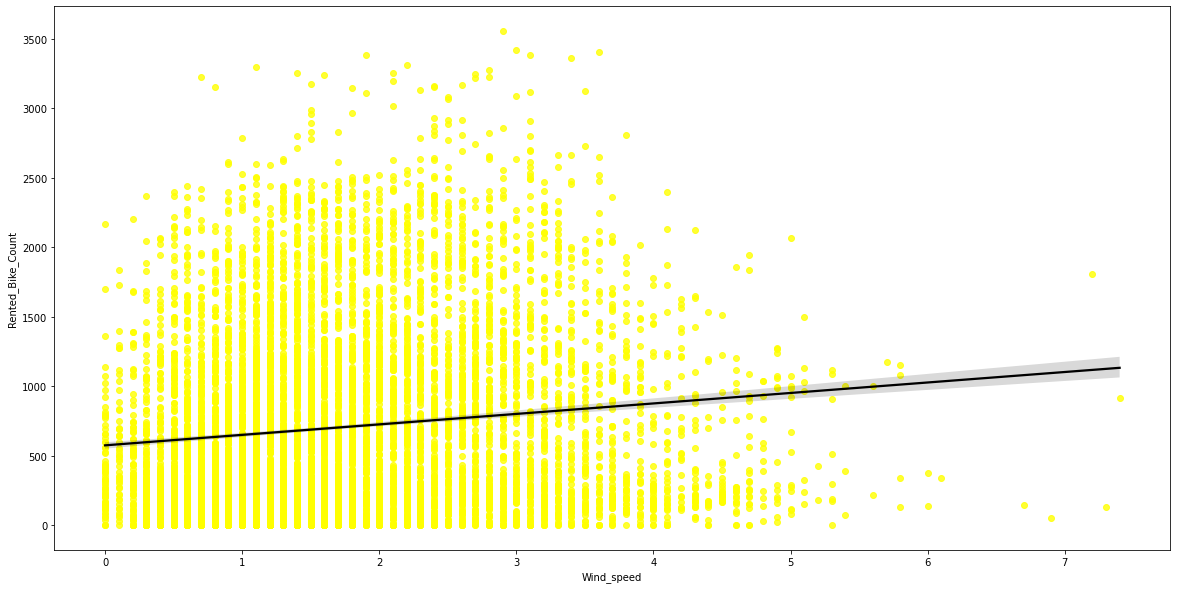

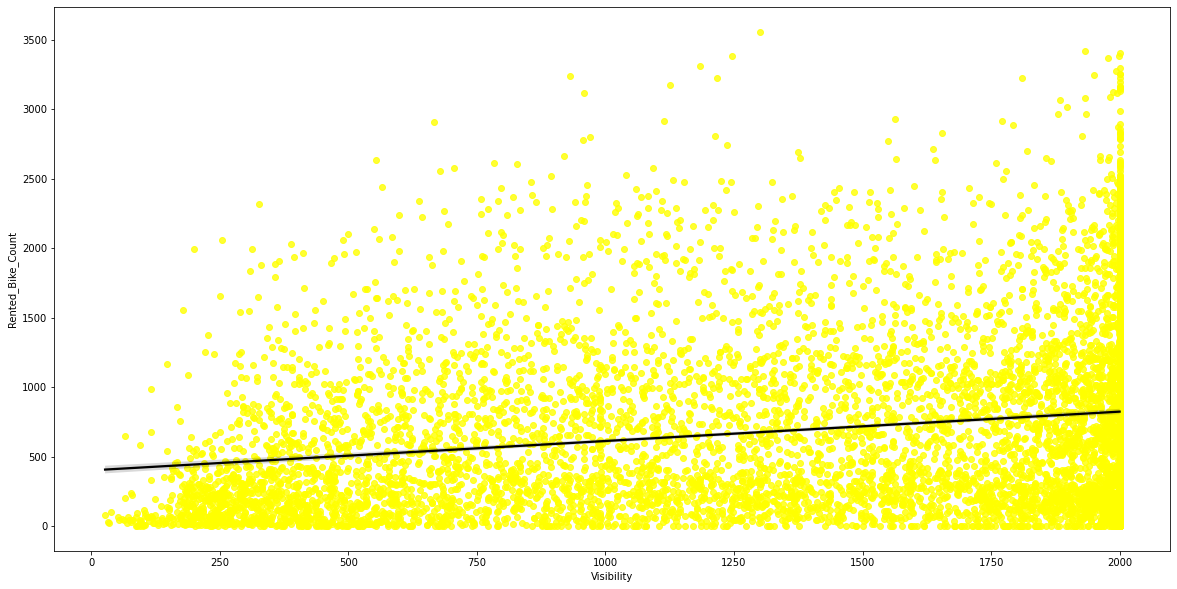

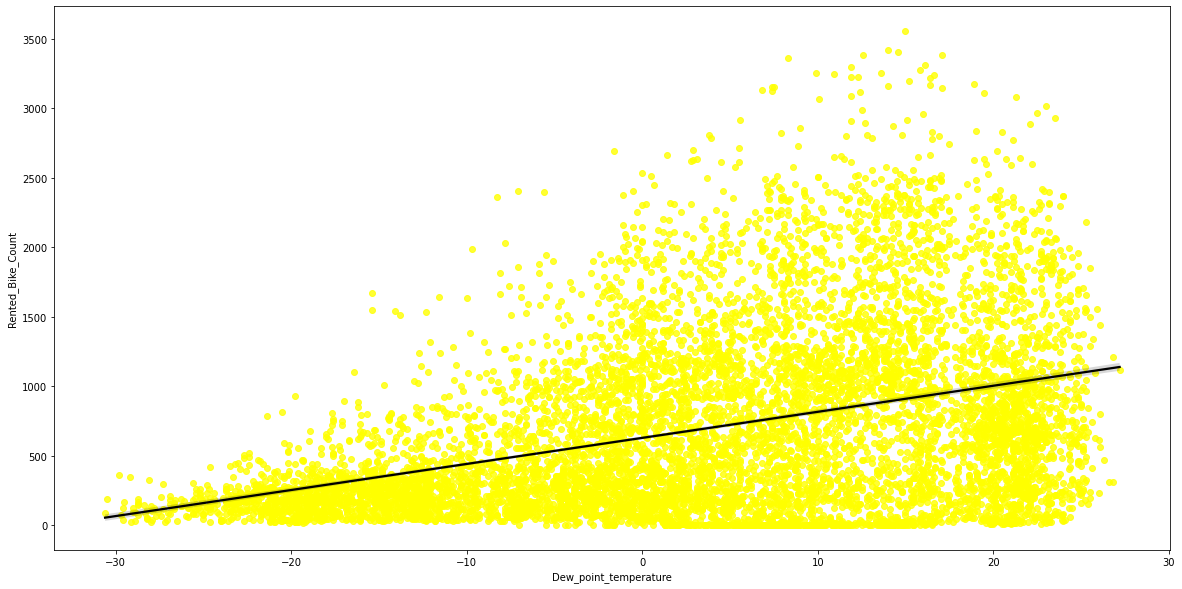

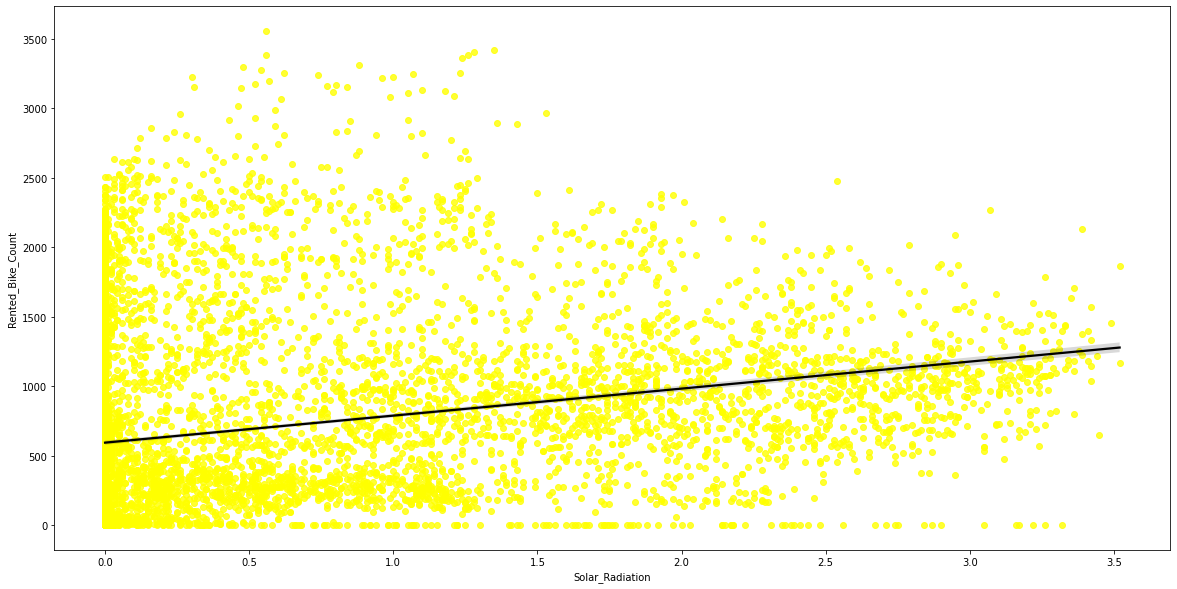

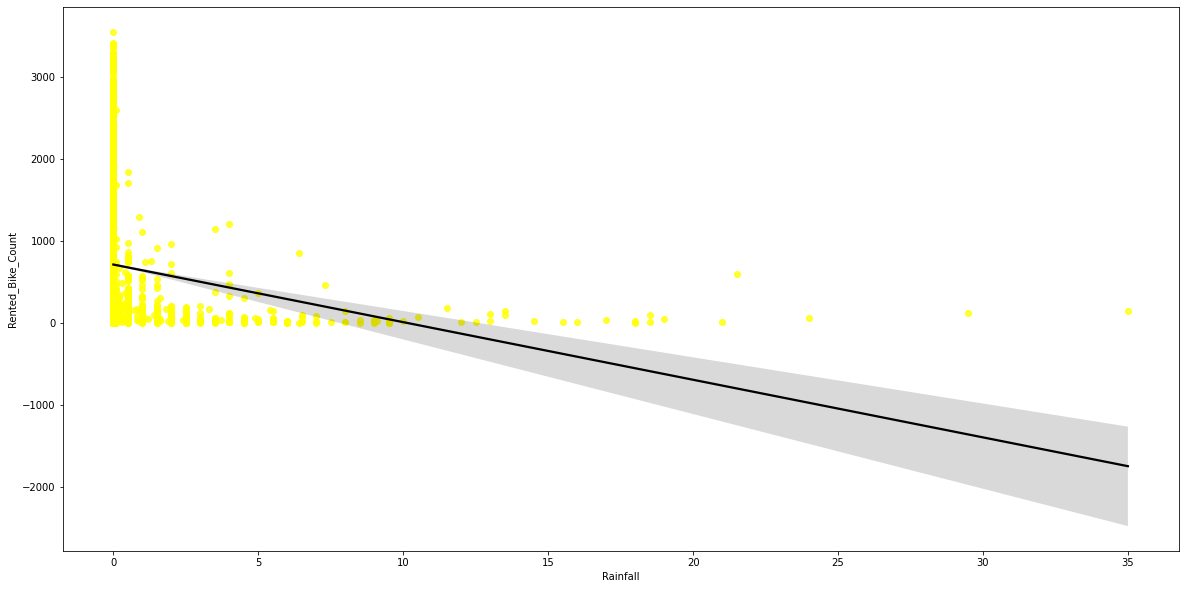

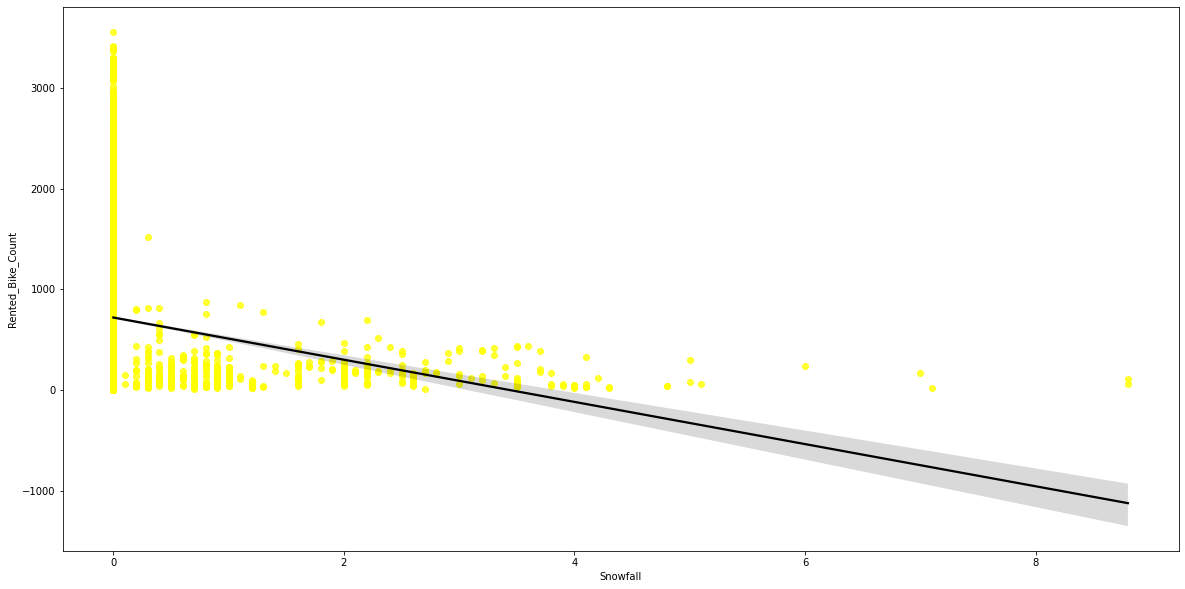

In [62]:
# Visualising all regression plots with numerical models

for i in numerical_data:
  fig,ax = plt.subplots(figsize = (20,10))
  sns.regplot(x = data[i], y = data['Rented_Bike_Count'],scatter_kws = {'color': 'yellow'}, line_kws = {'color':'black'})

From the above graphs we can see rented bike counte increses or decreses based on these numerical data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


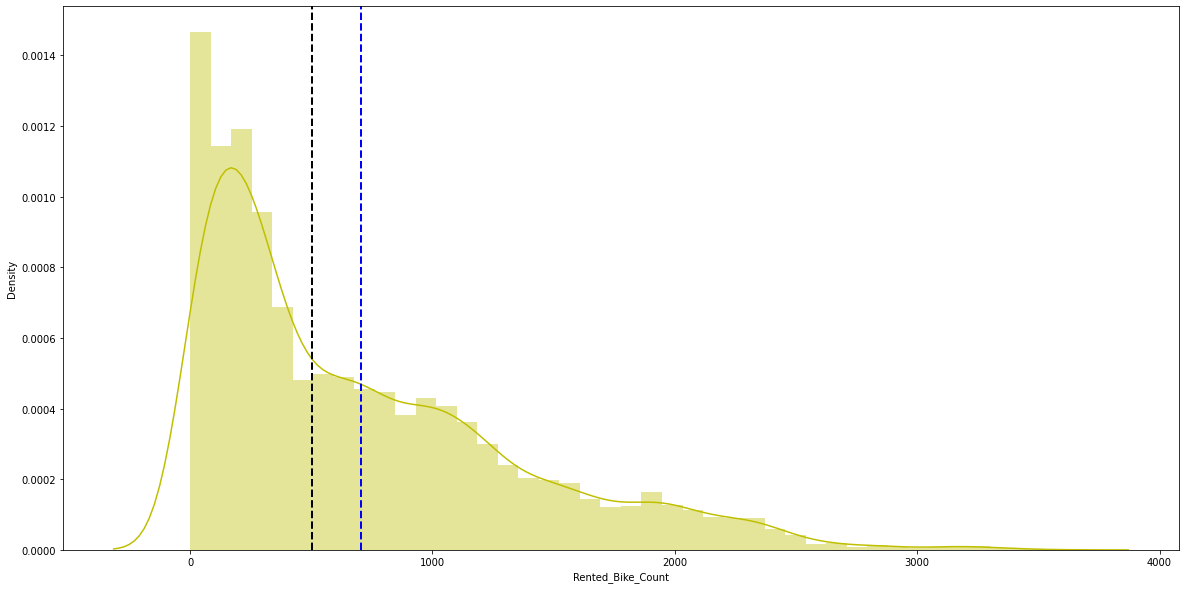

In [63]:
# Distribution plot of Rented bike count

plt.figure(figsize =(20,10))
plt.xlabel('Rented Bike count')
plt.ylabel('Density')
ax = sns.distplot(data['Rented_Bike_Count'], hist=True, color='y')
ax.axvline(data['Rented_Bike_Count'].mean(),color = 'blue', linestyle = 'dashed', linewidth = 2)
ax.axvline(data['Rented_Bike_Count'].median(),color = 'black', linestyle = 'dashed', linewidth = 2)
plt.show()

Rented bike count has right skewness. Linear regression assumes distribution variable has to be normal, so we should make it normal.

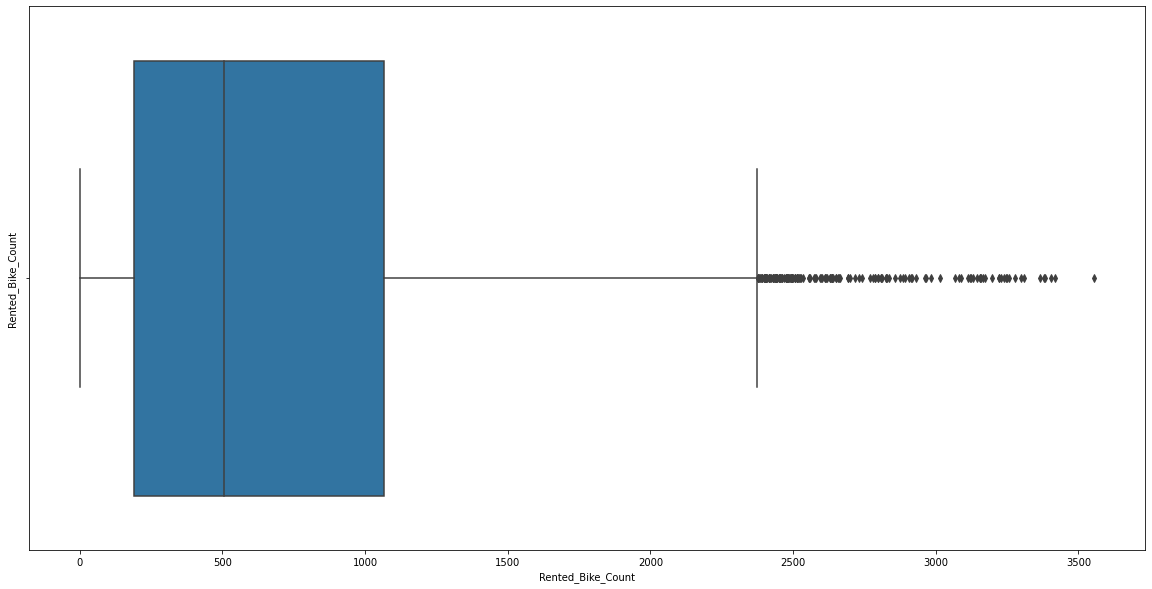

In [64]:
plt.figure(figsize=(20,10))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=data['Rented_Bike_Count'])
plt.show()

Above graph detect outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


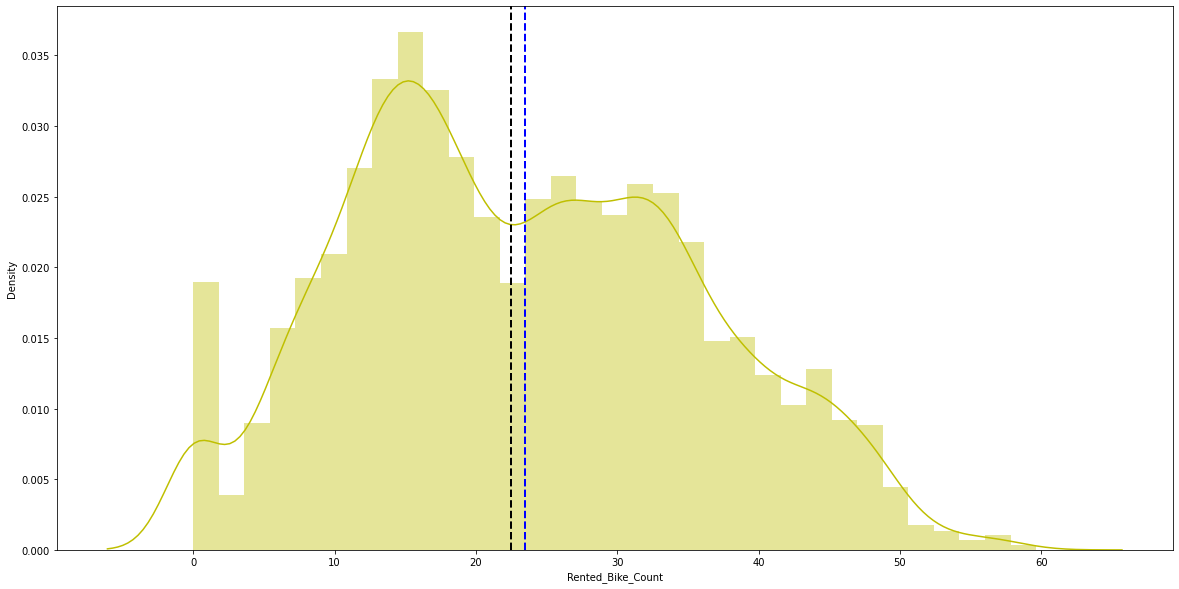

In [65]:
# Applying square root method to improve skewness

plt.figure(figsize=(20,10))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

ax = sns.distplot(np.sqrt(data['Rented_Bike_Count']), hist=True, color='y')
ax.axvline(np.sqrt(data['Rented_Bike_Count']).mean(),color = 'blue', linestyle = 'dashed', linewidth = 2)
ax.axvline(np.sqrt(data['Rented_Bike_Count']).median(),color = 'black', linestyle = 'dashed', linewidth = 2)
plt.show()

We have a generic rule of applying sqaure root for skewness to make it normal.After applying this methode got a normal distribution.

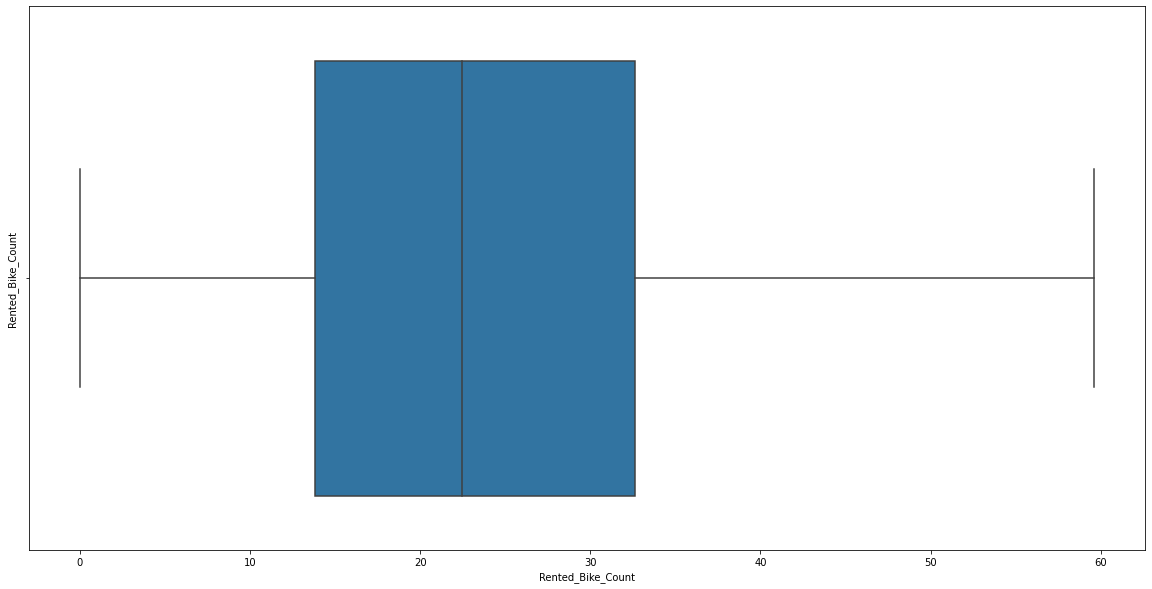

In [66]:
plt.figure(figsize=(20,10))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x = np.sqrt(data['Rented_Bike_Count']))
plt.show()

In [67]:
data.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


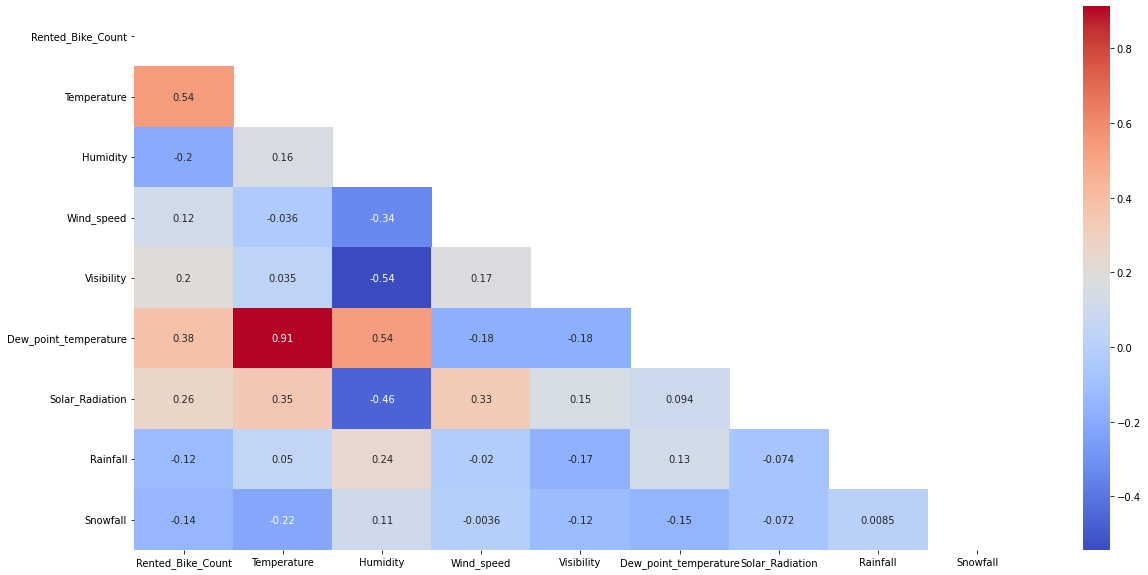

In [68]:
plt.figure(figsize=(20,10))
correlation = data.corr()
mask = np.triu(np.ones_like(correlation , dtype=bool))
sns.heatmap((correlation), mask = mask, annot = True, cmap ='coolwarm')

From the above graph,
Positively correlated variables
temperature
dew point temperature
solar radiation

Negatively correlated variables
Humidity
Rainfall
Snowfall



Temperature and Dew point temperature is 0.91
if I drop the column Dewpoint temperature the it won't affect our outcome.

In [69]:
data.head(1)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekday_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [70]:
# Dropping column
data = data.drop(['Dew_point_temperature'], axis = 1)


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekday_weekend    8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


In [72]:
# creating dummy varibales for categorical data

features = list(data.select_dtypes(['object','category']).columns)

features = pd.Index(features)
features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekday_weekend'],
      dtype='object')

One hot encoding allows us to convert category data to numerical data. This is required for bothn inut and output variables that are used in ml algos.

In [73]:
# One Hot Encoding

data_copy = data

In [74]:
def one_hot_encoding(data, column):
  data = pd.concat([data, pd.get_dummies(data[column],prefix = column, drop_first = True)], axis = 1)
  data =  data.drop([column], axis = 1)
  return data


for col in features:
  data = one_hot_encoding(data, col)
data.head()  



,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training and testing

## Train Test spliting in regresion

Before fitting any model it is rule of thumb to split the data into traing and testing data set. Mostly we use 80:20 for training and testing respectively. For splitting we will use scikit learn library.

In [89]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()
         ]

In [75]:
# Splitting

x = data.drop(columns = ['Rented_Bike_Count'], axis = 1)
y = np.sqrt(data['Rented_Bike_Count'])

In [76]:
x.head(1)

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42)
    pred = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [93]:
for model in models:
    train(model)

ValueError: ignored

In [77]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [78]:
import sklearn as scl

In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(x_test.shape)

(6570, 47)
(2190, 47)


In [80]:
data.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekday_weekend_1'],
      dtype='object')

### Mean square error(MSE) tells us how close a regression line is wrt set of points. The lower the mse the better.

### MSE formula = 1/n (sigma(actual - forecast))

n = no. of items
sigma = summation

actual = original y-value
forecast = y-value from regression


RMSE =  Root mean square error is the std. deviation of the prediction error

R2 is a statistical measure the represent the proportion of variance for a dependent variable wrt to independent variable or variables  in a regression model.






In [81]:
# Gradient descent
# Linear regression formula

In [82]:
from re import RegexFlag
# First Model

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [83]:
reg.score(x_train, y_train)


0.7557884266778845

In [84]:
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

In [85]:
# mse root mean square error(rmse) mean absolute error(mae), r2 adjusted r2
from sklearn.metrics import mean_squared_error

# calculating mse

mse = mean_squared_error((y_train) , (y_pred_train))
print("MSE: ",mse)

# calculating rmse
rmse = np.sqrt(mse)
print("RMSE: ",rmse)

from sklearn.metrics import mean_absolute_error
# Calculating mae
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE: ",mae)
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_pred_train)
print("R2: ",r2)

adjusted_r2 = (1-(1-r2_score(y_train, y_pred_train)) * (x_test.shape[0]-1) / (x_test.shape[0] - x_test.shape[1]-1)) 

print("Adjusted R2: ",adjusted_r2)

MSE:  37.60630594639787
RMSE:  6.132398058377968
MAE:  4.658244745512172
R2:  0.7557884266778845
Adjusted R2:  0.7504299094294533


In [86]:

# 9 days
# Random Forest Regression - 99%
# Gradient boosting Regression(grid search) - 95%